# SMART MANUFACTURING: MACHINE LEARNING APPROACHES FOR ACCURATE MECHANICAL FAULT DETECTION AND CLASSIFICATION

In [41]:
#importing dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import os

In [7]:

#uploading dataset

In [8]:
df = pd.read_csv(r'/Users/navyachilukoti/Documents/A19/A19code/Dataset/dataset.csv')
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,target
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17,1
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17,1
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17,1
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17,1
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71,0
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71,0
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71,0
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71,0


In [9]:
#data analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 14 columns):
u_q               1330816 non-null float64
coolant           1330816 non-null float64
stator_winding    1330816 non-null float64
u_d               1330816 non-null float64
stator_tooth      1330816 non-null float64
motor_speed       1330816 non-null float64
i_d               1330816 non-null float64
i_q               1330816 non-null float64
pm                1330816 non-null float64
stator_yoke       1330816 non-null float64
ambient           1330816 non-null float64
torque            1330816 non-null float64
profile_id        1330816 non-null int64
target            1330816 non-null int64
dtypes: float64(12), int64(2)
memory usage: 142.1 MB


In [11]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,target
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01,2.801281e-01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01,4.490618e-01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00,0.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01,0.000000e+00
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01,0.000000e+00
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01,1.000000e+00
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01,1.000000e+00


In [12]:
#data Correlection

In [13]:
df.corr()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,target
u_q,1.000000,0.051721,0.050610,0.004702,0.104373,0.683556,-0.100357,-0.124589,0.122365,0.090992,0.150264,-0.136215,-0.030499,-0.124406
coolant,0.051721,1.000000,0.504835,0.195517,0.674974,0.011872,0.074865,-0.256389,0.467117,0.860750,0.525963,-0.257982,0.635797,-0.438949
stator_winding,0.050610,0.504835,1.000000,-0.234950,0.970135,0.432034,-0.624370,0.065617,0.795893,0.860268,0.333208,0.095510,0.340580,-0.756781
u_d,0.004702,0.195517,-0.234950,1.000000,-0.142749,-0.288472,0.448331,-0.723069,-0.172031,-0.008098,0.203647,-0.753779,0.263264,0.145925
stator_tooth,0.104373,0.674974,0.970135,-0.142749,1.000000,0.398431,-0.487062,-0.042294,0.832084,0.953115,0.443470,-0.018413,0.450821,-0.758475
motor_speed,0.683556,0.011872,0.432034,-0.288472,0.398431,1.000000,-0.700609,-0.068881,0.458947,0.255790,0.118232,-0.043903,-0.028585,-0.356151
i_d,-0.100357,0.074865,-0.624370,0.448331,-0.487062,-0.700609,1.000000,-0.231344,-0.427736,-0.278005,0.016397,-0.274097,0.053524,0.445261
i_q,-0.124589,-0.256389,0.065617,-0.723069,-0.042294,-0.068881,-0.231344,1.000000,-0.142416,-0.131466,-0.314044,0.996457,-0.324654,-0.023313
pm,0.122365,0.467117,0.795893,-0.172031,0.832084,0.458947,-0.427736,-0.142416,1.000000,0.756684,0.513728,-0.117138,0.386241,-0.650497
stator_yoke,0.090992,0.860750,0.860268,-0.008098,0.953115,0.255790,-0.278005,-0.131466,0.756684,1.000000,0.520382,-0.117118,0.563437,-0.693660


In [14]:
#Checking NULL values

In [15]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
target            0
dtype: int64

In [16]:
df['target'].unique()

array([1, 0])

In [17]:
labels = ['No Fault','Fault']
labels

['No Fault', 'Fault']

In [18]:
#Data Visulazation

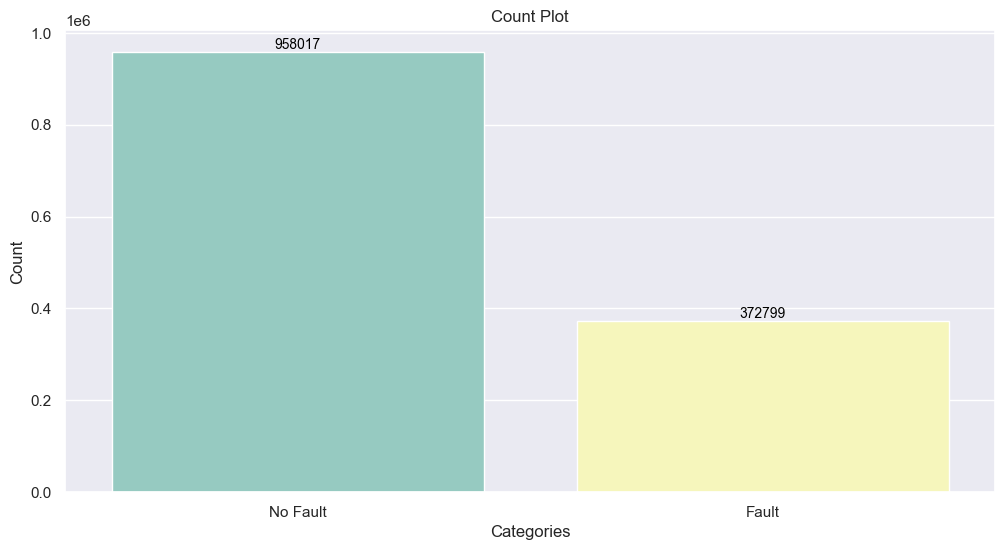

In [19]:
sns.set(style="darkgrid") 
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x=df['target'], data=df, palette="Set3")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 

ax.set_xticklabels(labels)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  

In [20]:
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,target
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17,1
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17,1
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17,1
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17,1
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71,0
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71,0
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71,0
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71,0


In [21]:
#Declaring independent and dependent variable

In [22]:
x = df.drop(['target','profile_id'],axis = 1)
x.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197


In [23]:
y = df['target']
y

0          1
1          1
2          1
3          1
4          1
          ..
1330811    0
1330812    0
1330813    0
1330814    0
1330815    0
Name: target, Length: 1330816, dtype: int64

In [24]:


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [25]:
x_train.shape

(931571, 12)

In [26]:
y_train.shape

(931571,)

In [27]:
#performance evalution

In [28]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [29]:
#Ridge Classifier model building

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeClassifier from version 1.0.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


RidgeClassifier Accuracy    : 97.15062179864495
RidgeClassifier Precision   : 96.0178765535225
RidgeClassifier Recall      : 97.01541100247837
RidgeClassifier FSCORE      : 96.49916603845975

 RidgeClassifier classification report
               precision    recall  f1-score   support

    No Fault       0.97      0.99      0.98    283716
       Fault       0.97      0.93      0.95    115529

    accuracy                           0.97    399245
   macro avg       0.97      0.96      0.96    399245
weighted avg       0.97      0.97      0.97    399245



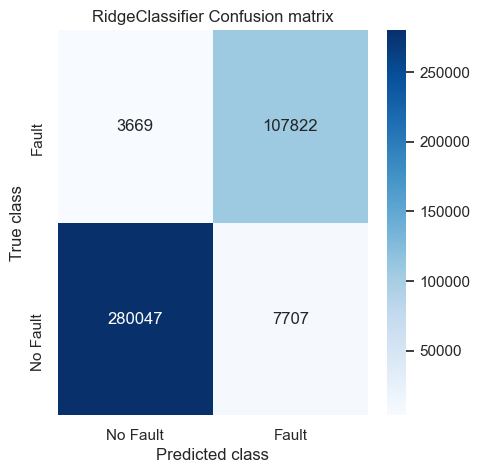

In [30]:
from sklearn.linear_model import RidgeClassifier

ridge_model_path = 'model/RidgeClassifier.npy'
if os.path.exists(ridge_model_path):
    ridge_classifier = np.load(ridge_model_path, allow_pickle=True).item()
else:                       
    ridge_classifier = RidgeClassifier()
    ridge_classifier.fit(x_train, y_train)
    np.save(ridge_model_path, ridge_classifier)

y_pred_ridge = ridge_classifier.predict(x_test)

performance_metrics('RidgeClassifier', y_pred_ridge, y_test)

In [31]:
# CatBoost Classifier model building

In [32]:
from catboost import CatBoostClassifier

catboost_model_path = '/Users/navyachilukoti/Documents/A19/A19code/model/CatBoostClassifier.npy'

if os.path.exists(catboost_model_path):
    catboost_classifier = CatBoostClassifier().load_model(catboost_model_path)
else:
    catboost_classifier = CatBoostClassifier()
    catboost_classifier.fit(x_train, y_train, verbose=False)
    catboost_classifier.save_model(catboost_model_path)

y_pred_catboost = catboost_classifier.predict(x_test)

catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
print("CatBoost Classifier Accuracy:", catboost_accuracy)

CatBoost Classifier Accuracy: 0.9992460769702814


CatBoost Classifier Accuracy    : 99.92460769702815
CatBoost Classifier Precision   : 99.92597017575699
CatBoost Classifier Recall      : 99.88671339136582
CatBoost Classifier FSCORE      : 99.90631813733455

 CatBoost Classifier classification report
               precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00    287897
       Fault       1.00      1.00      1.00    111348

    accuracy                           1.00    399245
   macro avg       1.00      1.00      1.00    399245
weighted avg       1.00      1.00      1.00    399245



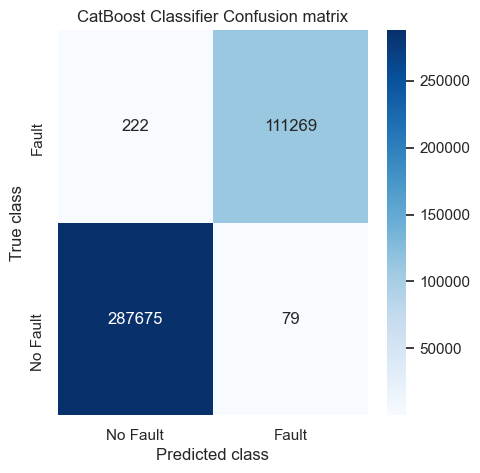

In [34]:
performance_metrics('CatBoost Classifier', y_pred_catboost, y_test)


### Tabular form of Performance Metrics

In [35]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["Ridge Classifier","CatBoost Classifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,Ridge Classifier,96.017877,97.015411,96.499166,97.150622
1,CatBoost Classifier,99.925970,99.886713,99.906318,99.924608


In [36]:
#Uploading testing dataset

In [37]:
test=pd.read_csv("/Users/navyachilukoti/Documents/A19/A19code/Dataset/test.csv")
test

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,90.010048,19.236008,50.021545,-93.309799,39.030525,4999.947754,-141.043076,52.998058,36.345753,28.799576,20.779097,48.489529
4,90.015923,19.162436,50.011501,-93.275330,39.070023,4999.953125,-141.171905,52.995888,36.276936,28.822945,20.624588,48.584831
5,90.142769,19.086964,50.134396,-93.113174,39.168396,4999.951660,-141.444672,52.985378,36.441761,28.892696,20.303011,48.648247


In [38]:
#Model prediction on test data

In [39]:
predict = catboost_classifier.predict(test)
prediction = []
for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i]) 
        print("Model Predicted of Row {} Test Data is--->".format(i),labels[0])
        prediction.append([labels[0]])
    elif p == 1:
        print(test.iloc[i])  
        print("Model Predicted of Row {} Test Data is--->".format(i),labels[1])
        prediction.append([labels[1]])
        

u_q               -0.450682
coolant           18.805172
stator_winding    19.086670
u_d               -0.350055
stator_tooth      18.293219
motor_speed        0.002866
i_d                0.004419
i_q                0.000328
pm                24.554214
stator_yoke       18.316547
ambient           19.850691
torque             0.187101
Name: 0, dtype: float64
Model Predicted of Row 0 Test Data is---> Fault
u_q               -0.325737
coolant           18.818571
stator_winding    19.092390
u_d               -0.305803
stator_tooth      18.294807
motor_speed        0.000257
i_d                0.000606
i_q               -0.000785
pm                24.538078
stator_yoke       18.314955
ambient           19.850672
torque             0.245417
Name: 1, dtype: float64
Model Predicted of Row 1 Test Data is---> Fault
u_q               -0.440864
coolant           18.828770
stator_winding    19.089380
u_d               -0.372503
stator_tooth      18.294094
motor_speed        0.002355
i_d             

In [40]:
test['Prediction'] = pd.DataFrame(prediction)
test

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,Prediction
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,Fault
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,Fault
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,Fault
3,90.010048,19.236008,50.021545,-93.309799,39.030525,4999.947754,-141.043076,52.998058,36.345753,28.799576,20.779097,48.489529,Fault
4,90.015923,19.162436,50.011501,-93.275330,39.070023,4999.953125,-141.171905,52.995888,36.276936,28.822945,20.624588,48.584831,Fault
5,90.142769,19.086964,50.134396,-93.113174,39.168396,4999.951660,-141.444672,52.985378,36.441761,28.892696,20.303011,48.648247,No Fault
